In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [71]:
data = pd.read_csv(r"/Users/yusufkhan/Desktop/Assessment/ML Question Paper/Datasets/bank.csv",delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [73]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [75]:
display('There is {} observations with {} features'.format(data.shape[0], data.shape[1]))

'There is 41188 observations with 21 features'

In [77]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [93]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [81]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

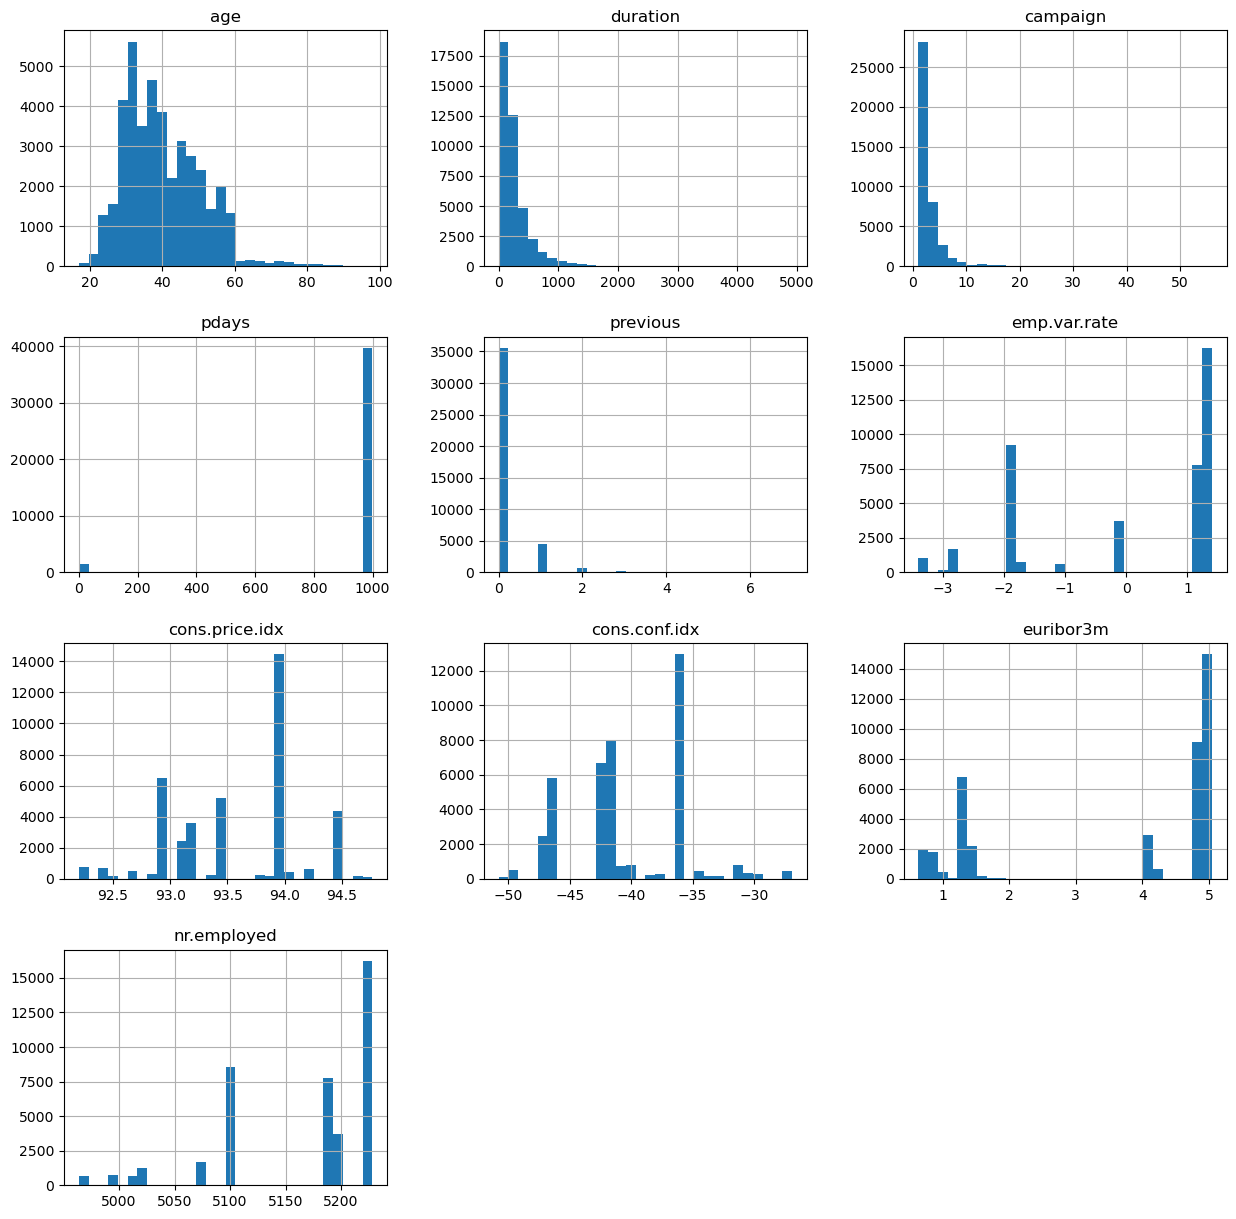

In [97]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[num_cols].hist(figsize=(15, 15), bins=30)
plt.show()

<Figure size 1000x600 with 0 Axes>

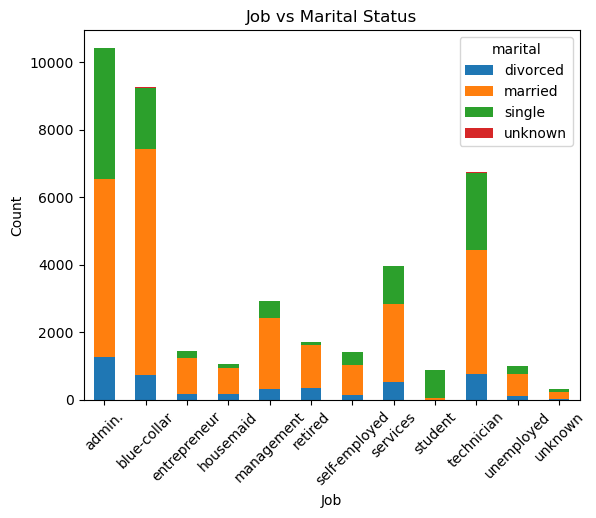

In [101]:
#Stacked bar plot for job and martial status
plt.figure(figsize=(10, 6))
pd.crosstab(data['job'], data['marital']).plot(kind='bar', stacked=True)
plt.title('Job vs Marital Status')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [105]:
data['target'] = np.where(data['y'].isin(['yes']), 1, 0)
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [109]:
print(data.groupby('education')['target'].mean())

education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
Name: target, dtype: float64


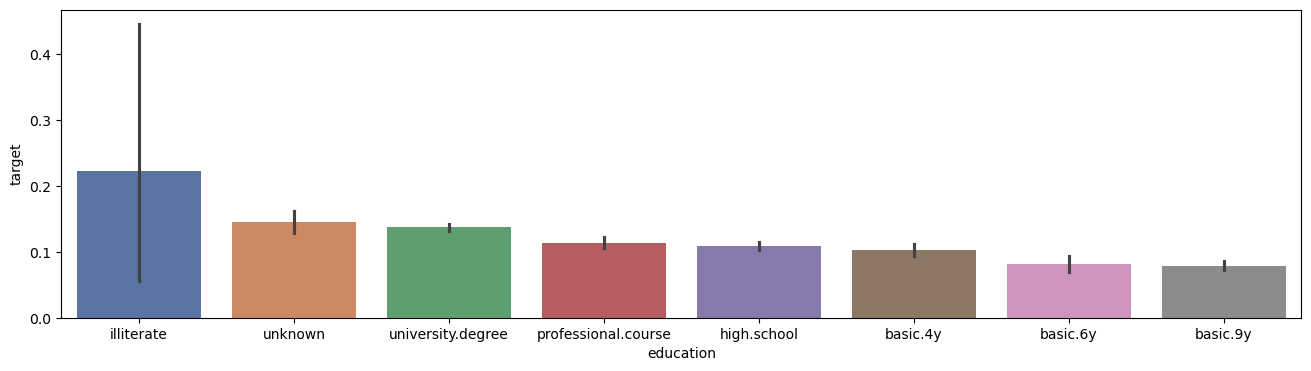

In [111]:
order = data.groupby('education')['target'].mean().sort_values(ascending=False).index
uniqs = data['education'].nunique()
if uniqs > 4:
    plt.figure(figsize=(16,4))
else:
    plt.figure(figsize=(10,6))
sns.barplot(x='education', y='target', data=data, estimator=np.mean, order=order,palette='deep')
plt.show()

In [ ]:
#High Performers:Illiterate (0.222): Highest success rate but likely due to vulnerabilities—avoid targeting directly. 
#University Degree (0.137) and Professional Course (0.113): Strong, desirable target audiences.

#Low Performers: Basic Education Levels (0.078–0.102): Below average,
#limited potential for targeting. Unknown (0.145): Above average but unreliable due to missing data—requires investigation.

#Actionable Insight: Focus on higher education groups (university, professional course).
#Address ethical concerns by supporting vulnerable groups (illiterate).

In [113]:
#Group basic.4y, basic.6y and basic.9y in one column named basic
data['education'] = data['education'].replace(
    {'basic.4y': 'basic', 'basic.6y': 'basic', 'basic.9y': 'basic'}
)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [121]:
#Also group illiterate and Unknown
data['education'] = data['education'].where(~data['education'].isin(['illiterate', 'unknown']), 'unknown')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [ ]:
# plotting variables against our traget variable to check their relevance to traget variable

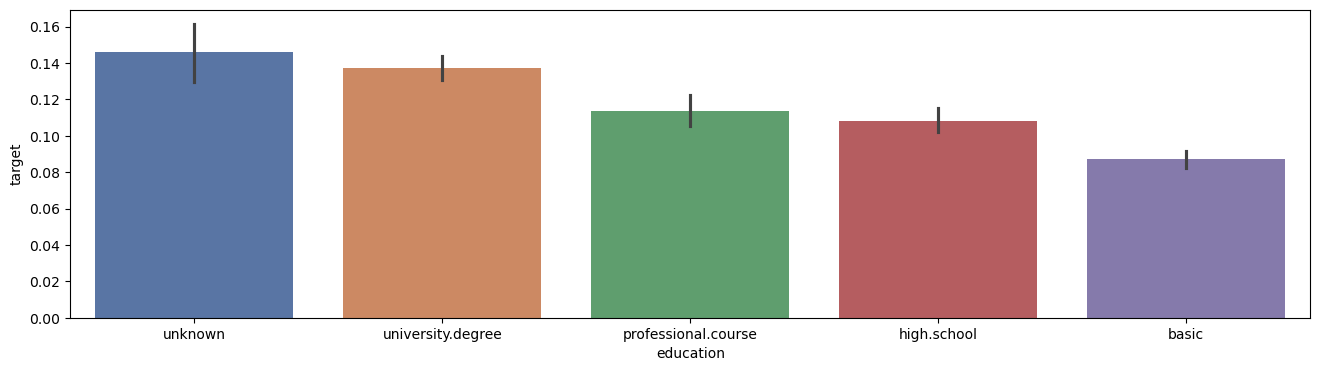

In [125]:
order = data.groupby('education')['target'].mean().sort_values(ascending=False).index
uniqs = data['education'].nunique()
if uniqs > 4:
    plt.figure(figsize=(16,4))
else:
    plt.figure(figsize=(10,6))
sns.barplot(x='education', y='target', data=data, estimator=np.mean, order=order,palette='deep')
plt.show()

In [129]:
print(data.groupby('job')['target'].mean())

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: target, dtype: float64


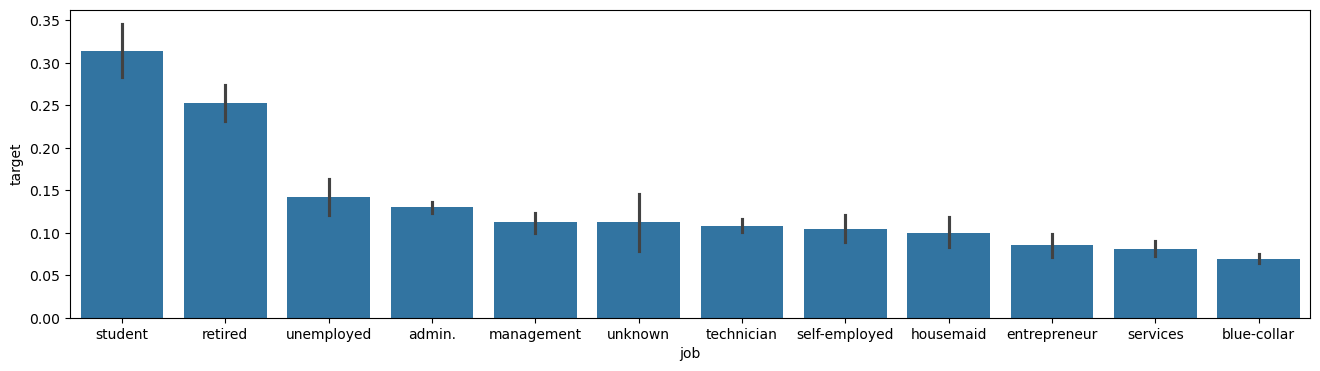

In [131]:
order = data.groupby('job')['target'].mean().sort_values(ascending=False).index
uniqs = data['job'].nunique()
if uniqs > 4:
    plt.figure(figsize=(16,4))
else:
    plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target', data=data, estimator=np.mean, order=order)
plt.show()

In [ ]:
#High Success Rates: Student (0.314) and Retired (0.252) show the highest success rates and are strong target audiences.

#Above Average: Admin (0.130) and Unemployed (0.142) are slightly above average and could be worth targeting.

#Low Success Rates: Blue-collar (0.069) and Services (0.081) have the lowest success rates, suggesting limited potential.

#Targeting Strategy: Focus on students and retired individuals.

In [133]:
#group unknown and unemployed into one bucket.
data['job'] = data['job'].where(~data['job'].isin(['unknown', 'unemployed']), 'unknown')

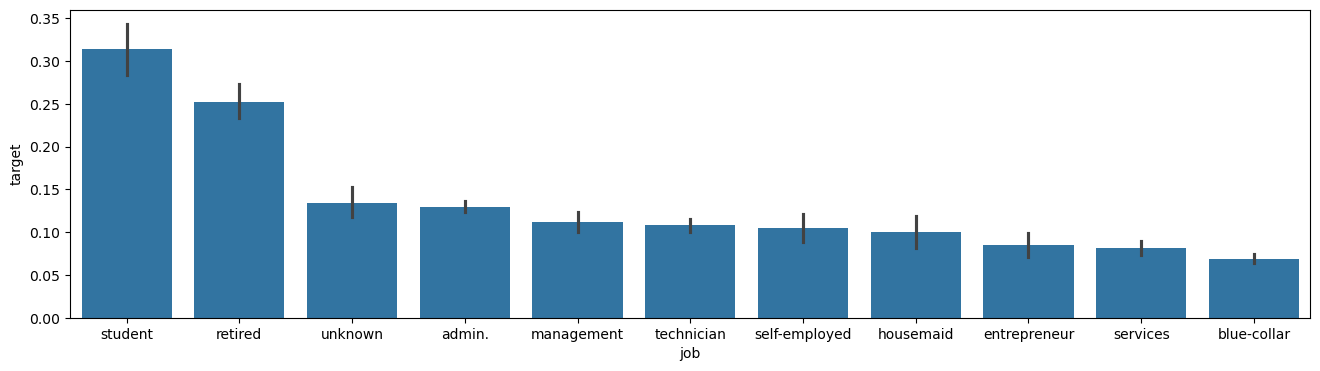

In [135]:
order = data.groupby('job')['target'].mean().sort_values(ascending=False).index
uniqs = data['job'].nunique()
if uniqs > 4:
    plt.figure(figsize=(16,4))
else:
    plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target', data=data, estimator=np.mean, order=order)
plt.show()

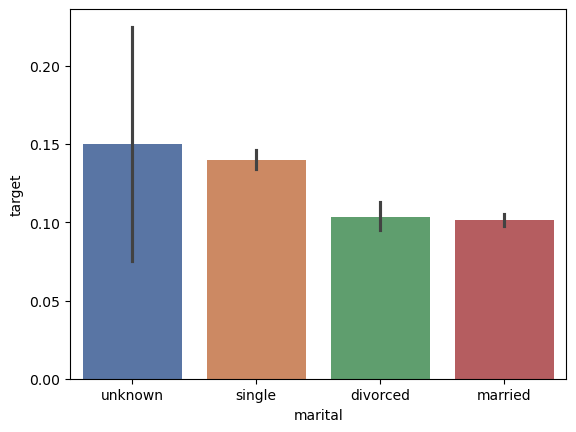

In [139]:
order = data.groupby('marital')['target'].mean().sort_values(ascending=False).index
sns.barplot(x='marital', y='target', data=data, estimator=np.mean, order=order,palette='deep')
plt.show()

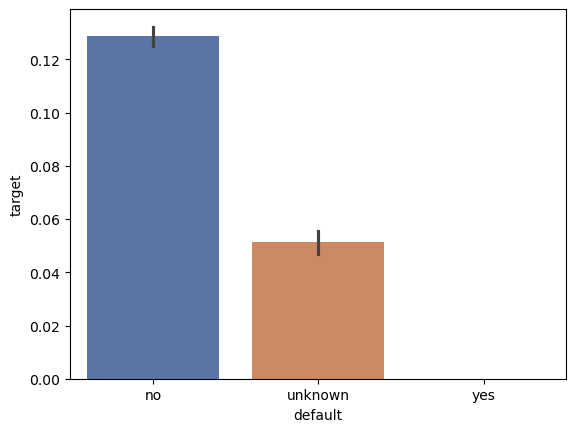

In [141]:
order = data.groupby('default')['target'].mean().sort_values(ascending=False).index
sns.barplot(x='default', y='target', data=data, estimator=np.mean, order=order,palette='deep')
plt.show()

In [145]:
data['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [151]:
data['default'] = data['default'].where(~data['default'].isin(['unknown']), 'yes')
data['default'].value_counts()

default
no     32588
yes     8600
Name: count, dtype: int64

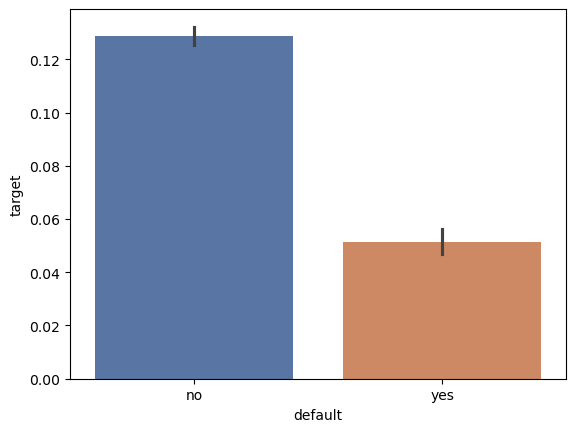

In [153]:
order = data.groupby('default')['target'].mean().sort_values(ascending=False).index
sns.barplot(x='default', y='target', data=data, estimator=np.mean, order=order,palette='deep')
plt.show()

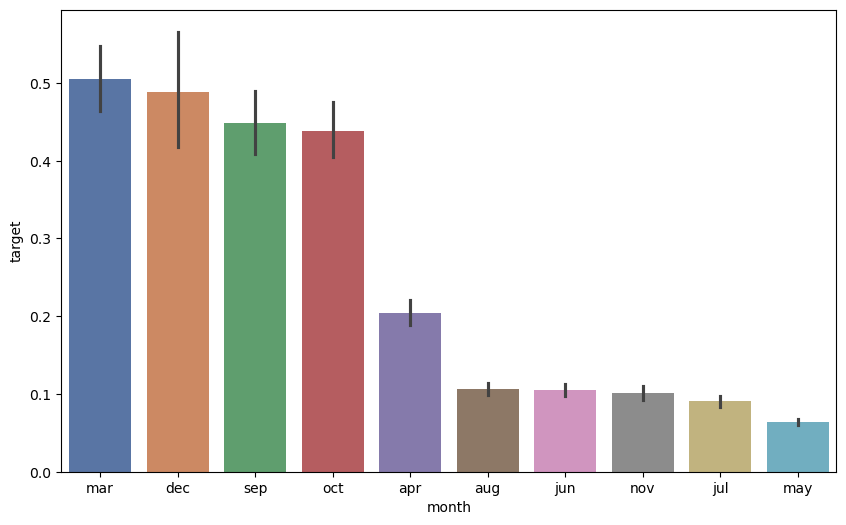

In [155]:
order = data.groupby('month')['target'].mean().sort_values(ascending=False).index
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='target', data=data, estimator=np.mean, order=order,palette='deep')
plt.show()

In [157]:
conditions = [
    data['month'].isin(['jan', 'feb', 'mar']),
    data['month'].isin(['apr', 'may', 'jun']),
    data['month'].isin(['jul', 'aug', 'sep']),
    data['month'].isin(['oct', 'nov', 'dec'])
]
choices = ['Q1', 'Q2', 'Q3', 'Q4']
data['qtr'] = np.select(conditions, choices, default=0)
data['qtr'].value_counts()

qtr
Q2    21719
Q3    13922
Q4     5001
Q1      546
Name: count, dtype: int64

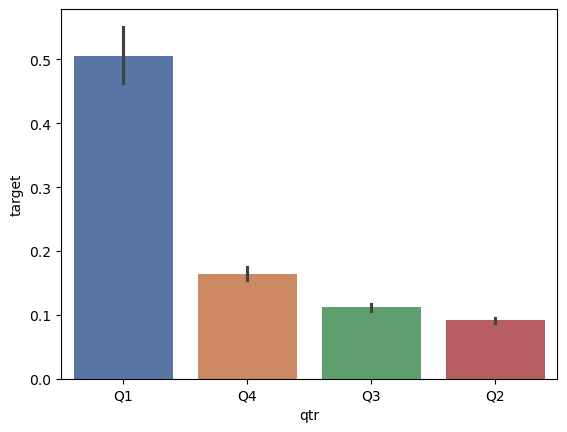

In [159]:
order = data.groupby('qtr')['target'].mean().sort_values(ascending=False).index
sns.barplot(x='qtr', y='target', data=data, estimator=np.mean, order=order,palette='deep')
plt.show()

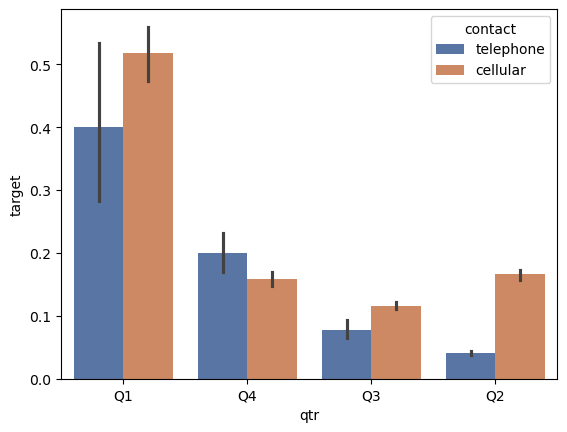

In [161]:
order = data.groupby('qtr')['target'].mean().sort_values(ascending=False).index
sns.barplot(x='qtr', y='target', data=data, hue='contact',estimator=np.mean, order=order,palette='deep')
plt.show()

In [163]:
data[data['contact'] == "cellular"].groupby('qtr')['target'].mean()

qtr
Q1    0.518519
Q2    0.165775
Q3    0.115961
Q4    0.158842
Name: target, dtype: float64

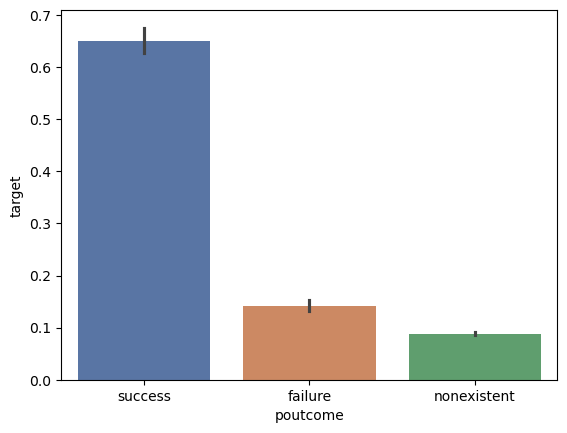

In [165]:
order = data.groupby('poutcome')['target'].mean().sort_values(ascending=False).index
sns.barplot(x='poutcome', y='target', data=data, estimator=np.mean, order=order,palette='deep')
plt.show()

In [167]:
data['poutcome'] = data['poutcome'].where(~data['poutcome'].isin(['failure',  'nonexistent']), 'failure')

In [169]:
data['poutcome'].value_counts()

poutcome
failure    39815
success     1373
Name: count, dtype: int64

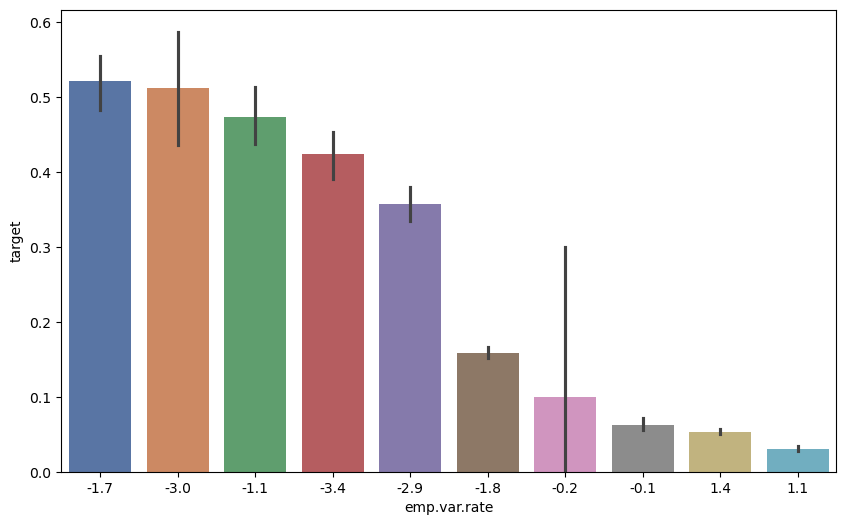

In [173]:
order = data.groupby('emp.var.rate')['target'].mean().sort_values(ascending=False).index
plt.figure(figsize=(10,6))
sns.barplot(x='emp.var.rate', y='target', data=data, estimator=np.mean, order=order,palette='deep')
plt.show()

In [187]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [189]:

data.shape

(41188, 21)

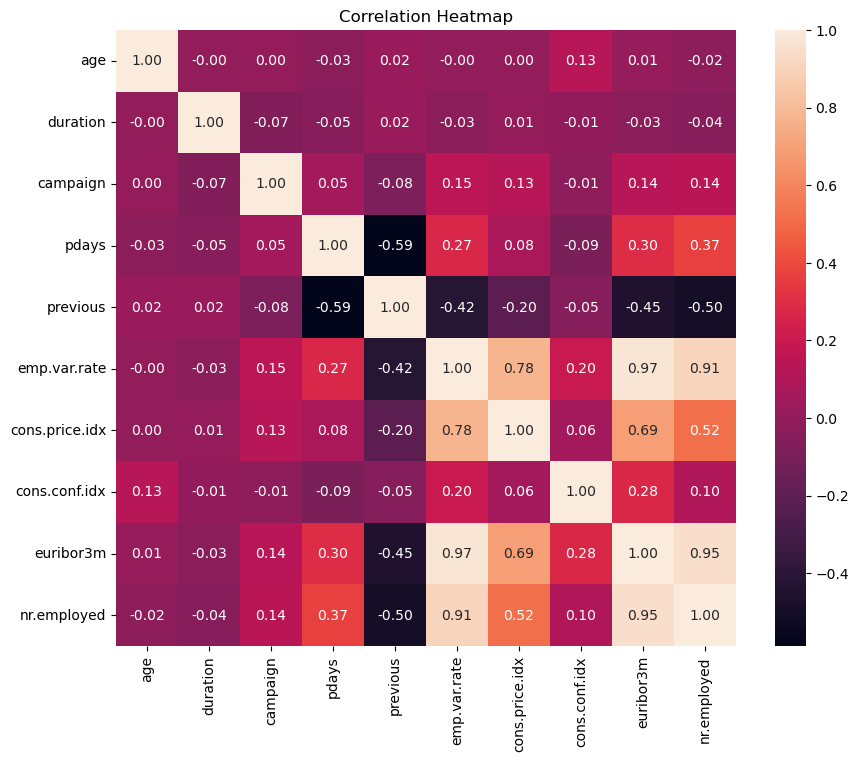

In [191]:
correlation_matrix = data[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [193]:
#emp.var.rate and euribor3m have a 0.972 correlation, meaning they are highly positively related.
#euribor3m and nr.employed have a 0.945 correlation, indicating a very strong positive relationship.
#emp.var.rate and nr.employed have a 0.907 correlation, which is also quite high
#So we can drop of this columns
data.drop(['emp.var.rate','euribor3m'],axis=1,inplace=True)
data.shape 

(41188, 19)

In [195]:
#handling outliers
outlier_columns = []
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if there are any outliers in the column
    if data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0] > 0:
        outlier_columns.append(column)

print(f"Columns with outliers based on IQR method: {outlier_columns}")


Columns with outliers based on IQR method: ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']


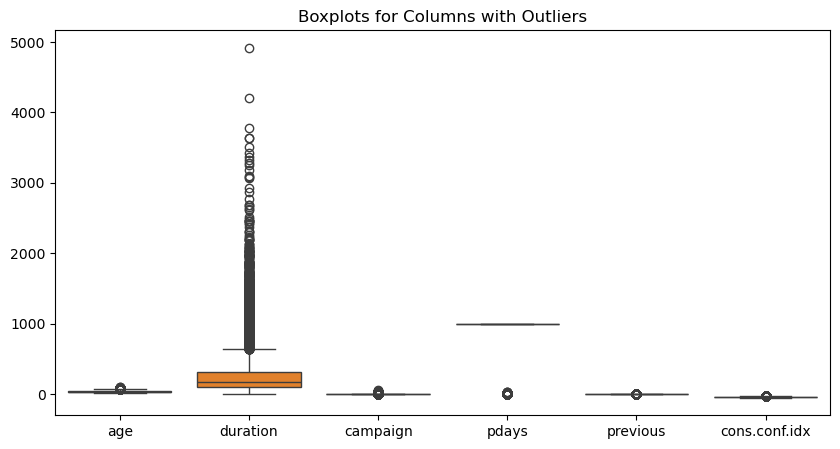

In [197]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']])
plt.title('Boxplots for Columns with Outliers')
plt.show()

In [199]:
for column in outlier_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print(f"Data shape after removing outliers: {data.shape}")

Data shape after removing outliers: (30360, 19)


In [201]:
unknown_columns = data.columns[data.isin(['unknown']).any()]
unknown_columns

Index(['job', 'marital', 'education', 'housing', 'loan'], dtype='object')

In [203]:
unknown_counts = data[['job', 'marital', 'education', 'housing', 'loan']].apply(lambda col: (col == 'unknown').sum())
print("\nCount of 'unknown' values in each column:")
print(unknown_counts)


Count of 'unknown' values in each column:
job           974
marital        46
education    1245
housing       735
loan          735
dtype: int64


In [205]:
# replacing unknown value with nan
data[['job', 'marital', 'education', 'housing', 'loan']] = data[['job', 'marital', 'education', 'housing', 'loan']].replace('unknown', np.nan)

In [207]:
data.isnull().sum().sum()

3735

In [209]:
#Imputing missing values with the mode for categorical columns
data['job'].fillna(data['job'].mode()[0], inplace=True)
data['marital'].fillna(data['marital'].mode()[0], inplace=True)
data['education'].fillna(data['education'].mode()[0], inplace=True)
data['housing'].fillna(data['housing'].mode()[0], inplace=True)
data['loan'].fillna(data['loan'].mode()[0], inplace=True)

In [213]:
#Encoding Catagorical columns
data.select_dtypes('number').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed'],
      dtype='object')

In [215]:
catagorical_coulumns=data.select_dtypes(include=['object']).columns
catagorical_coulumns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [217]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in catagorical_coulumns:
    data[x]=le.fit_transform(data[x])


In [219]:
x =data.drop(columns=['y'])  


NameError: name 'df' is not defined

In [221]:
y=data['y']

In [227]:
y.value_counts()
# as we see our data is for y is highly imbalanced

y
0    28705
1     1655
Name: count, dtype: int64

In [229]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
x,y = resampler.fit_resample(x,y)
y.value_counts()

y
0    28705
1    28705
Name: count, dtype: int64

In [231]:
# scaling our data
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

x = sc.fit_transform(x)

In [233]:
#splitting test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30360 entries, 0 to 41186
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30360 non-null  int64  
 1   job             30360 non-null  int64  
 2   marital         30360 non-null  int64  
 3   education       30360 non-null  int64  
 4   default         30360 non-null  int64  
 5   housing         30360 non-null  int64  
 6   loan            30360 non-null  int64  
 7   contact         30360 non-null  int64  
 8   month           30360 non-null  int64  
 9   day_of_week     30360 non-null  int64  
 10  duration        30360 non-null  int64  
 11  campaign        30360 non-null  int64  
 12  pdays           30360 non-null  int64  
 13  previous        30360 non-null  int64  
 14  poutcome        30360 non-null  int64  
 15  cons.price.idx  30360 non-null  float64
 16  cons.conf.idx   30360 non-null  float64
 17  nr.employed     30360 non-null  floa

In [259]:
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train)
  
Y_pred = lr.predict(X_test)

In [261]:
Y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [263]:
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test, Y_pred))

[[4948  778]
 [ 588 5168]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5726
           1       0.87      0.90      0.88      5756

    accuracy                           0.88     11482
   macro avg       0.88      0.88      0.88     11482
weighted avg       0.88      0.88      0.88     11482



In [265]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,Y_pred))
 
acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[4948  778]
 [ 588 5168]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5726
           1       0.87      0.90      0.88      5756

    accuracy                           0.88     11482
   macro avg       0.88      0.88      0.88     11482
weighted avg       0.88      0.88      0.88     11482

Accuracy of the model:  0.8810311792370668


In [267]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
 
# first, initialize the classificators
tree= DecisionTreeClassifier(random_state=10) # using the random state for reproducibility
knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
svm= SVC(kernel="rbf", gamma=0.1, C=90,random_state=10)
logreg=LogisticRegression(multi_class="multinomial",random_state=10)

In [273]:
models= [tree, knn, svm, logreg]

In [277]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
 
for model in models:
    model.fit(X_train, y_train) # fit the model
    Y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, Y_pred) 
    clf_report= classification_report(y_test, Y_pred) 
    print(confusion_matrix(y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

[[5437  289]
 [ 205 5551]]
The accuracy of the  DecisionTreeClassifier  model is  95.69761365615747
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      5726
           1       0.95      0.96      0.96      5756

    accuracy                           0.96     11482
   macro avg       0.96      0.96      0.96     11482
weighted avg       0.96      0.96      0.96     11482



[[5164  562]
 [ 155 5601]]
The accuracy of the  KNeighborsClassifier  model is  93.75544330256052
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94      5726
           1       0.91      0.97      0.94      5756

    accuracy                           0.94     11482
   macro avg       0.94      0.94      0.94     11482
weighted avg       0.94      0.94      0.94     11482



[[5372  354]
 [ 166 5590]]
The accuracy of the  SVC  model is  95.47117226963944
Classification 

In [279]:
#predicting using Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100,
                                         random_state=10,bootstrap=True,
                                         n_jobs=-1)
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,y_train)

Y_pred=model_RandomForest.predict(X_test)

In [281]:
Y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [283]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#confusion matrix
print(confusion_matrix(y_test,Y_pred))
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test,Y_pred))

[[5495  231]
 [ 116 5640]]
0.96977878418394
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5726
           1       0.96      0.98      0.97      5756

    accuracy                           0.97     11482
   macro avg       0.97      0.97      0.97     11482
weighted avg       0.97      0.97      0.97     11482



In [ ]:
#as we see random forest have the best accuracy out of three models 
